## Extra Solar Planets Lab record

Student id: 2663452m

Start by importing all the relevant packages.

In [2]:
import numpy as np     # Used for mathematical operations
import scipy as sp     # Used for manipulating data and functions
import matplotlib.pyplot as plt    # Used for plotting
import es as es     # A script supplied from the a2 folder defining a complex function
import os     # Used for operations on directories

The aims for the first method of this experiment (The Doppler Wobble Method) are
    
To understand the effect of Doppler Shifts on the intensity of stellar spectra and use the sp.optimize library to determine best-fits for radial velocities from high resolution observed on different dates
    
Derive radial velocity Curves for each star and use sp.optimize.curve_fit to estimate the amplitude of each curve

Estimate the mass and semi-major axis of each planet

Useful Equations for the First method given in the labscript 

$$
  v_{s} = (\frac{2\pi G}{T})^{1/3}M_{S}^{-2/3}m_{p}
$$ (Equation 1)
$$
  v_{pred} = v_{mean} + v_{s}\cos[2\pi(\phi_{obs}-\phi_{max})]
$$ (Equation 2)
$$
  G(M_{S} + m_{p}) = \frac{4\pi^{2}a^{3}}{T^{2}}
$$ (Equation 3)
Where the symbols take there usual values and $\phi$ is the phase

# **Method 1 The Dobbler Wobble Technique**

# 1.1 Task 1


In this task we are expected to import the template data set and do an initial plot of this ideal data to obtain a graph of the intensity with respect to the wavelength

In [3]:
data = np.loadtxt('G5V_template.txt') # Import data for the G5V star

In [4]:
wavelength = data[:,0]     # Split data into respective columns and define them
intensity = data[:,1]

In [5]:
text_size_plots = 25   # sets a base text size for all plots and enable them to change all at once

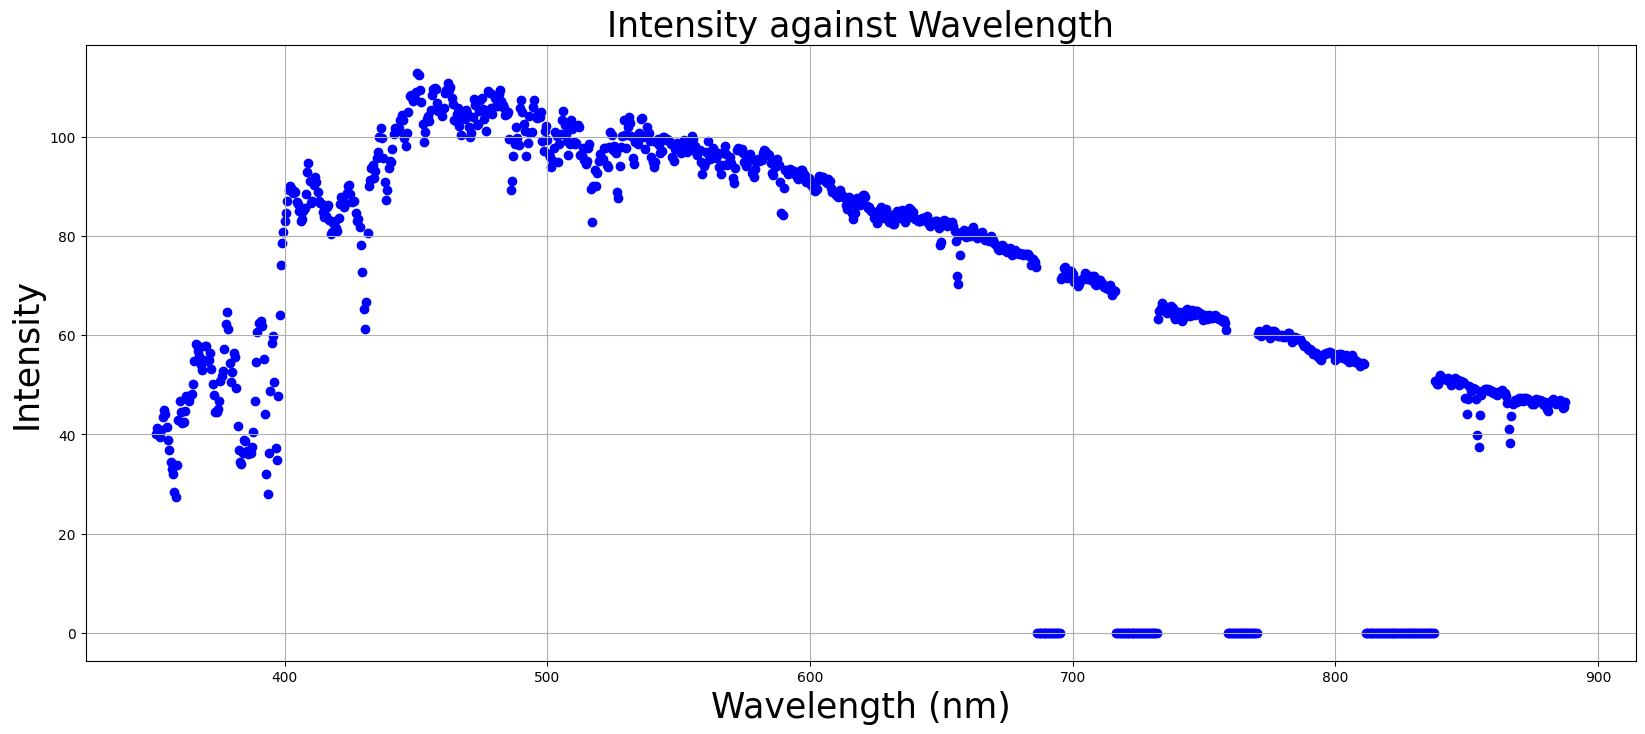

In [6]:
plt.figure(figsize=(44,8))   # plot the reference data fom above to graphical show the data and its relation 

plt.subplot(121)
plt.scatter(wavelength,intensity,marker="o",color="b",)
plt.grid(True)
plt.title("Intensity against Wavelength", size=text_size_plots)
plt.xlabel("Wavelength (nm)", size=text_size_plots)
plt.ylabel("Intensity", size=text_size_plots)

plt.show()

# 1.1 Task 2


In this task we are expected to calculate shifted spectra using the function labelled 'es' provided at some different radial velocities and determine graphically when there is a noticable difference in the shifted spectrum

In [7]:
shift_i1 = es.shiftSpectrum(wavelength,intensity,1)
shift_i2 = es.shiftSpectrum(wavelength,intensity,10000)
shift_i3 = es.shiftSpectrum(wavelength,intensity,100000)
shift_i4 = es.shiftSpectrum(wavelength,intensity,10000000)     

# Uses the given function to shift the intensity of the star by some reference velocity which is given by the third term


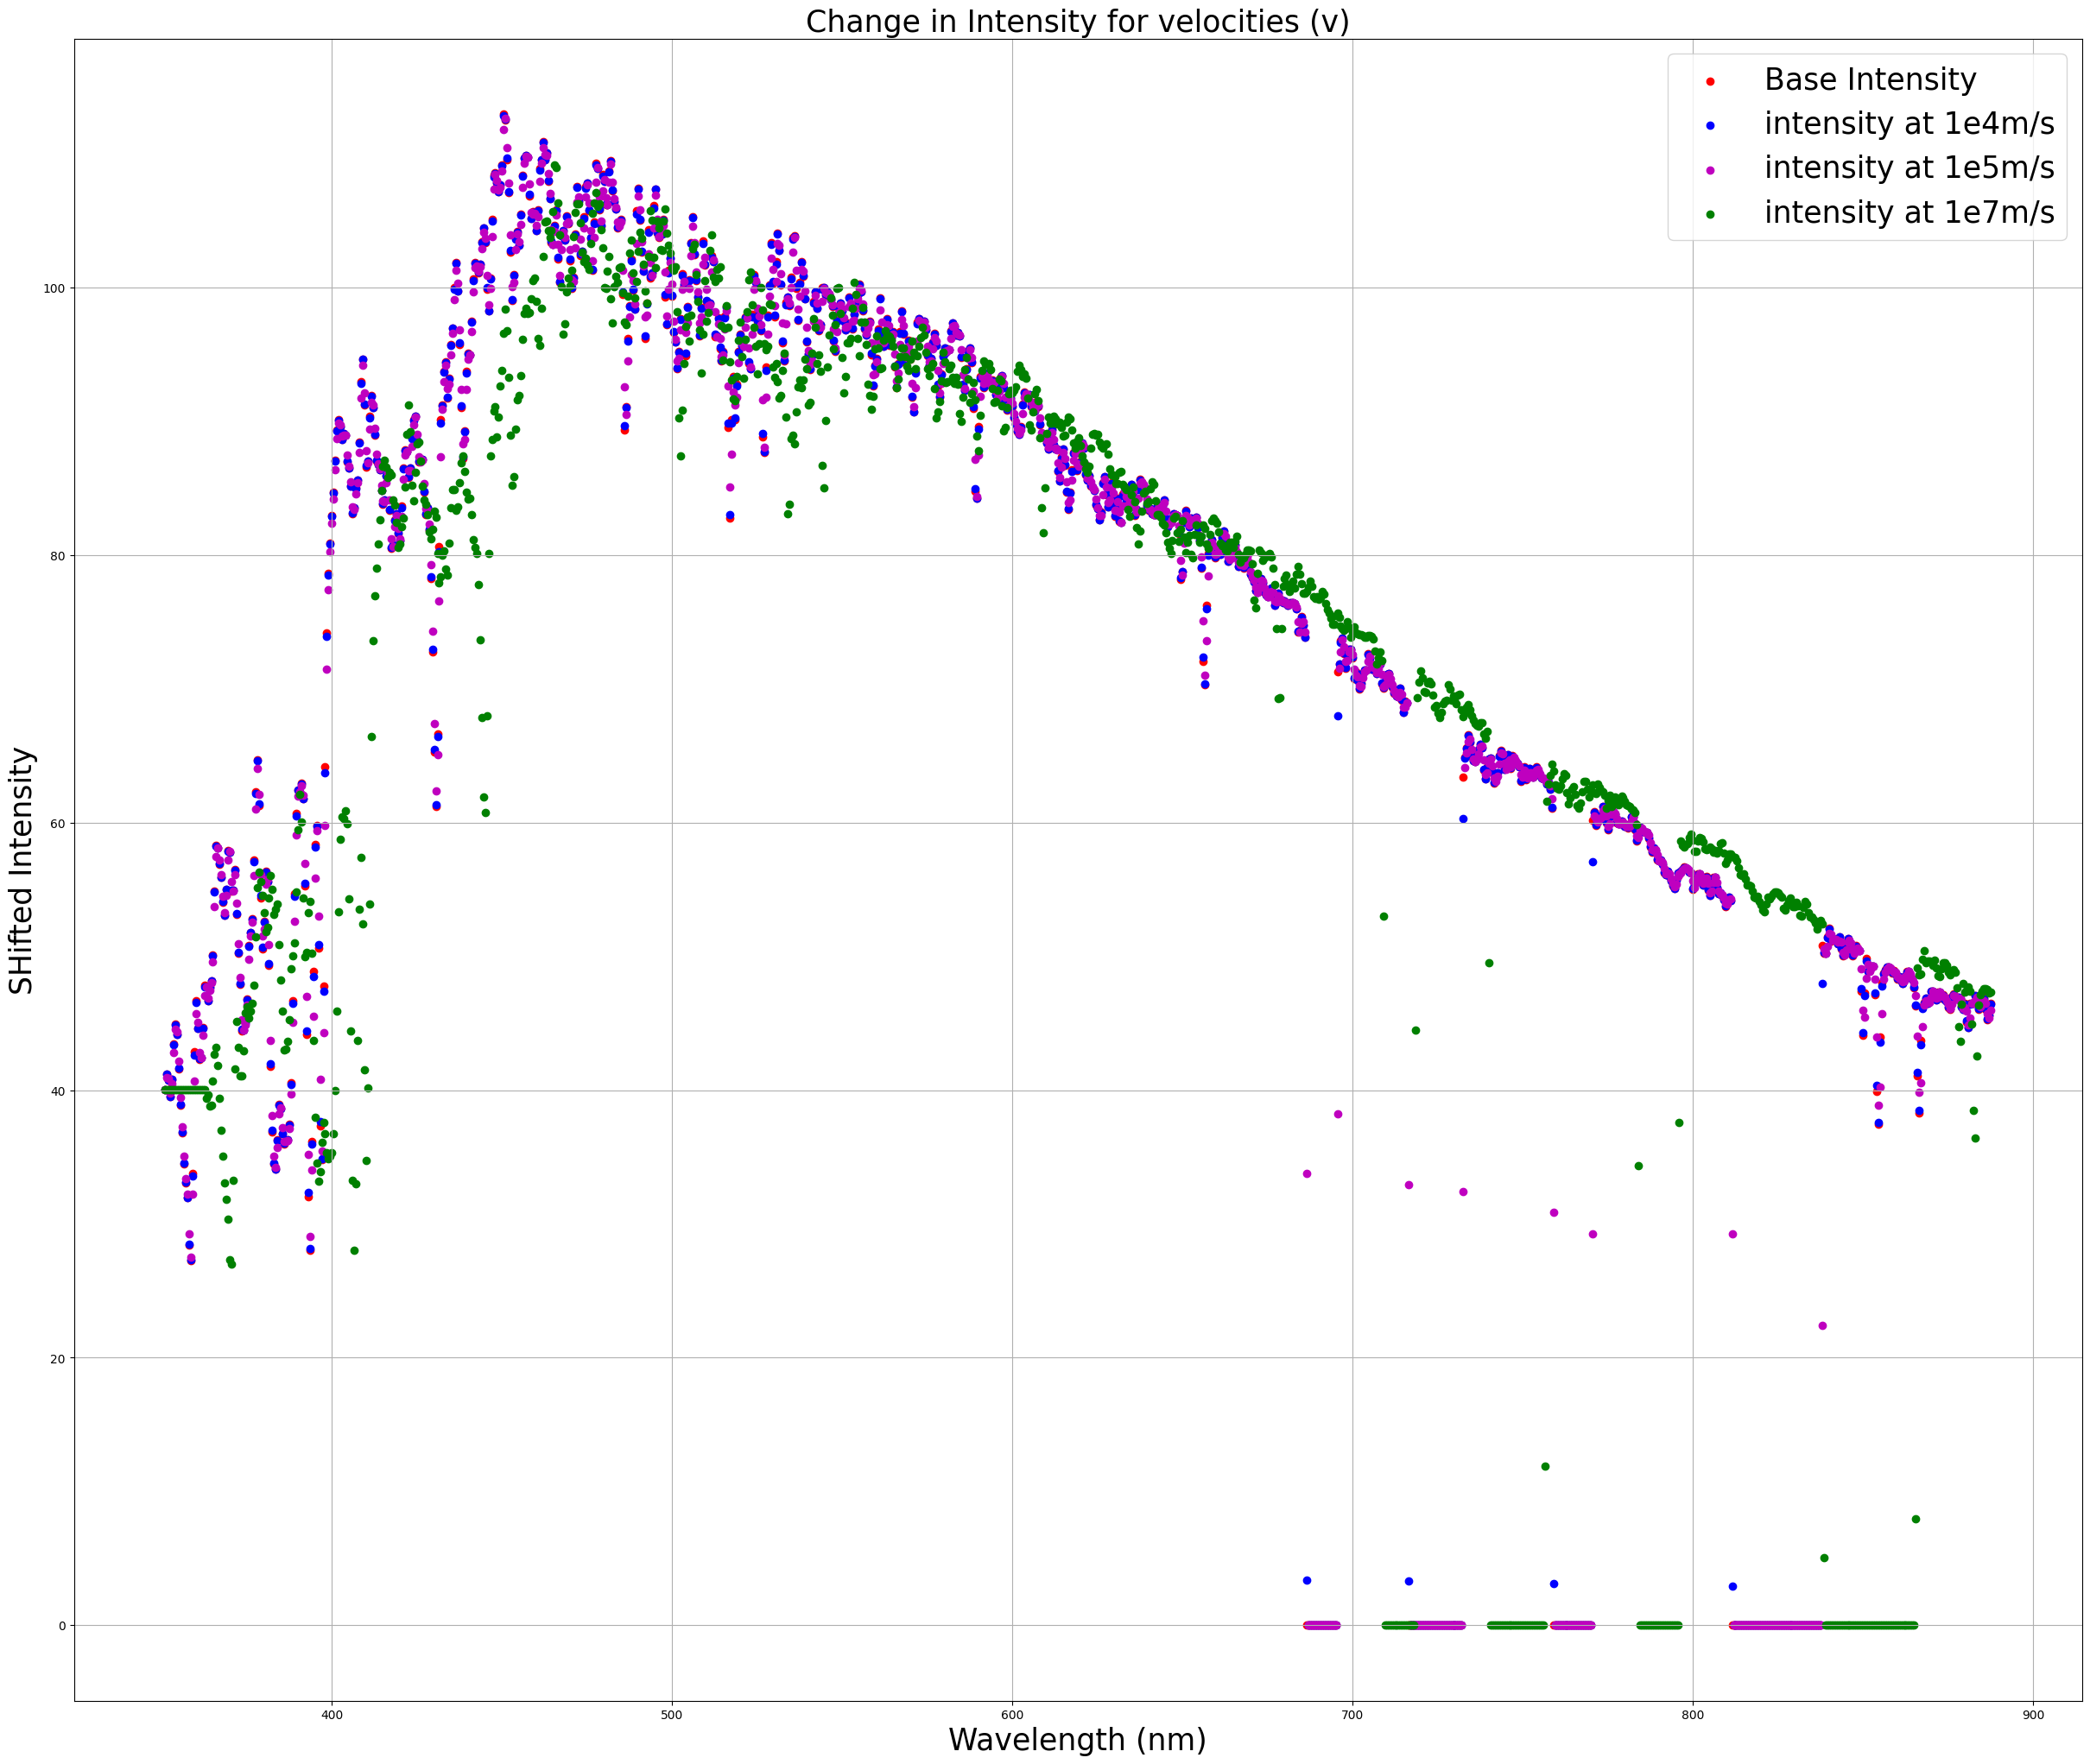

In [8]:
# Plot the reference wavelength against the new shifted intensity 4 times for different velocities on the same graph

plt.figure(figsize=(30,25))  
plt.scatter(wavelength,shift_i1,marker="o",color="r", label='Base Intensity')
plt.scatter(wavelength,shift_i2,marker="o",color="b", label='intensity at 1e4m/s')
plt.scatter(wavelength,shift_i3,marker="o",color="m",label='intensity at 1e5m/s')
plt.scatter(wavelength,shift_i4,marker="o",color="g",label='intensity at 1e7m/s')

plt.grid(True)
plt.title("Change in Intensity for velocities (v)", size=text_size_plots)
plt.xlabel("Wavelength (nm)", size=text_size_plots)
plt.ylabel("SHifted Intensity", size=text_size_plots)
plt.legend(fontsize=text_size_plots)
plt.show()

 **Difference in Spectra due to different Radial Velocities**  
For velocities v < 1e5m/s there is negligible difference in shifted spectra, as shown by the blue data set in reference to the red data 


For velocities 1e5m/s < v < 1e7m/s there is noticeable but not huge difference in shifted spectra, the magenta data is slightly different from the red data


For velocities v > 1e7m/s there is a large difference in shifted spectra from the base value as seen by the green data being significantly different from the red data

# 1.2 Task 1


For this task we are expected to open a file containing the template data for the G5V star as well as a column of the actual observed intensity of the star, this data can then be used in an optimize.curve_fit function to obtain the expected radial velocity of the star on the julian date specified in the filename in this case Julian date 2451460 and add the error to it that is given in the lab script

In [9]:
# Load new data into the notebook and format it so that the third column is defined as the actual intensity of the star

JD51460_data = np.loadtxt('JD51460.txt')    
JD51460Inten = JD51460_data[:600,2]

FileNotFoundError: JD51460.txt not found.

In [10]:
#Limiting the reference data to be for all values less than wavelengths of 650nm, as there are inconsistencies above this 

wavelength_600 = data[:600,0]   
intensity_600 = data[:600,1]


In [11]:
# Using the given function es.shiftspectrum we define a function that will vary the velocity and use the sp.optimize.curve_fit function to 
# find the optimal line of best fit for the actual data when using the theorectical data as a reference 

def shiftedintensity(wavelength_600,velocity):
    return es.shiftSpectrum(wavelength_600,intensity_600,velocity)
popt,_ = sp.optimize.curve_fit(shiftedintensity,wavelength_600,JD51460Inten, p0=(20000))

NameError: name 'JD51460Inten' is not defined

In [ ]:
print('The radial velocity of the star that provides the best curve fit is {0:.2f}m/s ± 15m/s'.format(popt[0]))
# best fit solution for shifted data


The radial velocity of the star that provides the best curve fit is 21821.23m/s ± 15m/s


# 1.2 Task 2

This task is a repeat of the task above but for all the data sets on different julian dates and for both the stars this uses the python techniques of 'for loops' and 'def' to increase efficiency as it means we do not need to write the same code 60 times.

In [12]:
# Import the directory of data containing all the data for the first star and extract this data into the relevant columns
# Carry out the curve_fit optimisation for this array of data and print each optimal velocity next to the corresponding julian date along with the error that was given in the lab script


path = "/home/2663452m/examples/a2/extra_solar_data/HD-28185/"
file_list = sorted(os.listdir(path))

datesG5 = [0]
radvel_5 = [0]

for file in file_list:
    filename = path + file
    data_wavelength,data_intensity=np.loadtxt(filename,unpack=True,usecols=[0,2])
    data_wavelength600 = data_wavelength[:600]
    data_intensity600 = data_intensity[:600]
    
    
    
    def shiftedintensity(data_wavelength600,velocity):
        return es.shiftSpectrum(data_wavelength600,intensity_600,velocity)
    popt,_ = sp.optimize.curve_fit(shiftedintensity,data_wavelength600,data_intensity600, p0=(20000) , absolute_sigma=True)
    date = (file[2:7])
    
    datesG5.append(date)
    radvel_5.append(popt[0])
    
    print(f'On Julian date 24{date} the best fit radial velocity is {popt[0]:.2f}m/s with a radial velocity uncertainty of ±15m/s')

FileNotFoundError: [Errno 2] No such file or directory: '/home/2663452m/examples/a2/extra_solar_data/HD-28185/'

In [13]:
# Import the directory of data containing all the data for the second star and extract this data into the relevant columns
# Carry out the curve_fit optimisation for this array of data and print each optimal velocity next to the corresponding julian date along with the error that was given in the lab script



G8_data = np.loadtxt('G8V_template.txt')
G8_wavelength = G8_data[:,0]
G8_intensity = G8_data[:,1]
G8_wavelength600 = G8_wavelength[:600]
G8_intensity600 = G8_intensity[:600]

datesG8 = [0]
radvel_8 = [0]

path = "/home/2663452m/examples/a2/extra_solar_data/HD-73256/"
file_list = sorted(os.listdir(path))
for file in file_list:
    filename = path + file
    data_wavelength,data_intensity=np.loadtxt(filename,unpack=True,usecols=[0,2])
    data_wavelength600 = data_wavelength[:600]
    data_intensity600 = data_intensity[:600]
    
    
    
    def shiftedintensity(data_wavelength600,velocity):
        return es.shiftSpectrum(data_wavelength600,G8_intensity600,velocity)
    popt,_ = sp.optimize.curve_fit(shiftedintensity,data_wavelength600,data_intensity600, p0=(20000) , absolute_sigma=True)
    date = (file[2:12])
    
    datesG8.append(date)
    radvel_8.append(popt[0])
    
    print(f'On julian date 24{date} the best fit radial velocity is {popt[0]:.2f}m/s with a radial velocity uncertainty of ±15m/s')

FileNotFoundError: G8V_template.txt not found.

# 1.3 Task 1


In this task we take the array of the radial velocities on the different dates for the two stars and plot two seperate graphs of this data against the Julian dates to obtain an estimated graph of the radial velocity as a function of time for both stars

In [14]:
# This is some number and array manipulation that was necessary 
#for plotting the graphs below but has no significant value to the experiment itself


dates_G5 = np.fromiter(datesG5, dtype=float)
dates_G8 = np.fromiter(datesG8, dtype=float)
dates5 = dates_G5[1:31]
dates8 = dates_G8[1:31]
radvel5 = radvel_5[1:31]
radvel8 = radvel_8[1:31]



NameError: name 'datesG5' is not defined

In [15]:
# This plots the Radial velocity against the Julian Dates for the first star which obtains a 
#roughly sinusoidal graph of the stars radial velocity with time

plt.figure(figsize=(12,12))

plt.scatter(dates5,radvel5)

plt.grid(True)
plt.title("HD-28185", size=text_size_plots)
plt.xlabel("Julian dates", size=text_size_plots)
plt.ylabel("Radial Velocity m/s", size=text_size_plots)

plt.show()

NameError: name 'dates5' is not defined

<Figure size 1200x1200 with 0 Axes>

In [16]:
# This plots the Radial velocity against the Julian Dates for the second star which obtains a roughly
#sinusoidal graph of the stars radial velocity with time


plt.figure(figsize=(12,12))

plt.scatter(dates8,radvel8)

plt.grid(True)
plt.title("HD-73256", size=text_size_plots)
plt.xlabel("Julian dates", size=text_size_plots)
plt.ylabel("Radial Velocity m/s", size=text_size_plots)

plt.show()

NameError: name 'dates8' is not defined

<Figure size 1200x1200 with 0 Axes>

# 1.3 Task 2



In this task we are expected to calculate the phase of the two stars on their specified julian dates and project some estimated error onto them.

In [17]:
# This is calculating the phase for each of the data sets and extracting the data where p is the phase and T is the period


p = [0]
T1 = [0]
for date in (dates5):
    t_elapsed5 = (date-51460)
    
    T = (t_elapsed5/383)
    
    T1.append(T)
    P = (T-int(T))
    p.append(P)
    
p2 = [0]
t2 = [0]    
for date in (dates8):
    t_elapsed8 = (date-52640.0300)
      
    T2 = (t_elapsed8/2.54858)
    t2.append(T2)
  
    P2 = (T2-int(T2))

    p2.append(P2)

NameError: name 'dates5' is not defined

In [18]:
# Calculating the error in the period which is the same as the error in the phase

Terr = (np.array(T1)*0.00522)
Terr_30 = Terr[1:31]
# Some data manipulation so that the arrays are of a specified size

N_30 = p[1:31]

N2_30 = p2[1:31]

# print(Terr)

NameError: name 'p2' is not defined

# 1.3 Task 3 


In this task we are to plot the radial velocities against the phases for each star to find the sinusoidal approximation for the radial velocity as a function of time

In [19]:
# This is plotting the radial velocity for the first star against the phase to obtain the true graph for the radial velocity 
#with respect to time


plt.figure(figsize=(12,12))

plt.scatter(N_30,radvel5)

plt.grid(True)
plt.title("HD-28185", size=text_size_plots)
plt.xlabel("Phase", size=text_size_plots)
plt.ylabel("Radial Velocity m/s", size=text_size_plots)

plt.show()

NameError: name 'radvel5' is not defined

<Figure size 1200x1200 with 0 Axes>

In [20]:
# This is plotting the radial velocity for the second star against the phase to obtain the true graph for the radial velocity 
#with respect to time



plt.figure(figsize=(12,12))

plt.scatter(N2_30,radvel8)

plt.grid(True)
plt.title("HD-73256", size=text_size_plots)
plt.xlabel("Phase", size=text_size_plots)
plt.ylabel("Radial Velocity m/s", size=text_size_plots)

plt.show()

NameError: name 'N2_30' is not defined

<Figure size 1200x1200 with 0 Axes>

# 1.4 Task 1



For this task we are to calculate the unknown parameters in Equation 2,  $v_{mean}, v_{s}$ and $\phi_{max}$ using and optimize.curve_fit function as well as the parameter covariance output of this function to determine the errors in these values

This is then repeated for the second star

In [21]:
# Use sp.optimize.curve_fit to find the unknown values in equation 2 and using the covariance matrix to find the associated errors


v_pred=radvel5
phi_obs = np.sort(N)
b = np.ones(30)*15

def eqn2(phi_obs,v_mean,v_s,phi_max):
    return (v_mean+(v_s*np.cos(2*np.pi*(phi_obs-phi_max))))
   
params,pcov = sp.optimize.curve_fit(eqn2,N_30,radvel5, p0=(21000,50,0.2) ,sigma = b, absolute_sigma=True)
# print(params)
perr = np.sqrt(np.diag(pcov))
# print(perr)

print('The mean velocity of the star is {0:.2e}m/s ± {3:.2f}m/s, the amplitude of the radial velocity graph is {1:.2e} ± {4:.2f} and the phi_max value is {2:.2e} ± {5:.2f}'.format(params[0],params[1],params[2],perr[0],perr[1],perr[2]))

NameError: name 'radvel5' is not defined

In [22]:
v_pred2=radvel8
phi_obs2 = np.sort(N2)


def eqn3(phi_obs2,v_mean2,v_s2,phi_max2):
    return (v_mean2+(v_s2*np.cos(2*np.pi*(phi_obs2-phi_max2))))
   
params2,pcov2 = sp.optimize.curve_fit(eqn3,N2_30,radvel8, p0=(13000,120,0.2) , sigma = b,absolute_sigma=True)
# print(params2)
perr2 = np.sqrt(np.diag(pcov2))
# print(perr2)
print('The mean velocity of the star is {0:.2e}m/s ± {3:.2f}m/s, the amplitude of the radial velocity graph is {1:.2e} ± {4:.2f} and the phi_max value is {2:.2e} ± {5:.2f}'.format(params2[0],params2[1],params2[2],perr2[0],perr2[1],perr2[2]))

NameError: name 'radvel8' is not defined

# 1.5 Task 1


In this task we used Equation 1 to find the mass of the planetary companions of the two stars and then proceeded to use Equation 3 to estimate the semi-major axis of the planets orbit, while still propagating errors onto our new values.

In [23]:
# Calculating the mass of the planetary companions for the stars when assuming the mass if the star to be an average main 
#sequence star in this case I assumed the mass of the star to be approximately the mass of the sun

import scipy.constants as consts
v_s5 = params[1]
m_s = (2*10**30)


m_p = (v_s5/(((((2*np.pi*consts.G)/T))**(1/3))*(m_s**(-2/3))))
# print(m_p)



v_s8 = params2[1]
m_s2 = (2*10**30)

m_p2 = (v_s8/(((((2*np.pi*consts.G)/T2))**(1/3))*(m_s2**(-2/3))))
# print(m_p2)

NameError: name 'params' is not defined

In [24]:
#Error analysis
Terr = (np.array(T1)*0.00522)
# m_perr**2 is going to be (Terr**1/3)**2 + perr[1]**2

m_perrarray = (((Terr**(1/3))**2) + (perr[1]**2))**(1/2)


m_perr = np.mean(m_perrarray)
# print(m_perr)

Terr2 = (np.array(t2)*0.000063)

m_perrarray2 = (((Terr2**(1/3))**2) + (perr2[1]**2))**(1/2)

m_perr2 = np.mean(m_perrarray2)

# print(m_perr2)


NameError: name 'perr' is not defined

In [25]:
print('The mass of the planetary companion around the star HD-28185 is estimated to be {0:.4e}kg ± {1:.2f}%'.format(m_p,m_perr))
print('The mass of the planetary companion around the star HD-73256 is estimated to be {0:.4e}kg ± {1:.2f}%'.format(m_p2,m_perr2))

NameError: name 'm_p' is not defined

In [26]:
a1 = ((((T**2)*consts.G*(m_s+m_p))/(4*(np.pi**2)))**(1/3))
# print(a1)
a2 = ((((T2**2)*consts.G*(m_s2+m_p2))/(4*(np.pi**2)))**(1/3))
# print(a2)

print('The semi-major axis of the planetary companions orbit around the star HD-28185 is estimated to be {0:.4e}m'.format(a1))
print('The semi-major axis of the planetary companions orbit around the star HD-73256 is estimated to be {0:.4e}m'.format(a2))

NameError: name 'T' is not defined

In [27]:
Terr = (np.array(T1)*0.00522)

# **Task 2 The Planetary Transits Method**

The aims of the second method of the experiment are
  
To obtain a Phase-folded photometric light curve for a star with a transiting planetary companion and use this to estimate the radius and semi-major axis of the planet
    
Apply The method of least squares to estimate mean apparent magnitudes during the transit and non-transit phase, hence estimate the radius of the planet

Useful Equations for the Second Method of the Experiment



$$
  G(M_{S} + m_{p}) = \frac{4\pi^{2}a^{3}}{T^{2}}
$$ (Equation 3)

# 2.1 Task 1


For this task we are to obtain a Phase-folded Light Curve for the star OGLE-III-TR56 this is done by first loading data and seperating it into the useful arrays and then using a for loop to calculate the period and then the phase for all the values, this phase was then plotted against the I-band magnitude of the star to visualize the dip in magnitude due to a star transiting the stars surface in the plane facing Earth. 

And then using limits to zoom in on the area of data that contains the dip in magnitude as this is the useful data

In [28]:
data = np.loadtxt('OGLE_III_TR56.txt')

FileNotFoundError: OGLE_III_TR56.txt not found.

In [29]:
P = 1.21190
JulianDate_TR = data[:,0]
I_b = data[:,1]
m_err = data[:,2]

Phase_TR = np.array([])
for a in JulianDate_TR:
    t_ela = float(a) - 2452075.6312
    T_orbit = t_ela/P
    calc = T_orbit//1
    Phase_21 = T_orbit-calc
    Phase_TR = np.append(Phase_TR,Phase_21)

    
plt.figure(figsize = (16,8))    
plt.scatter(Phase_TR,I_b)
plt.title('I-Band light curve of star OGLE_III_TR56', size=text_size_plots)
plt.xlabel('Phase', size=text_size_plots)
plt.ylabel('Magnintude of the I-band', size=text_size_plots)
plt.errorbar(Phase_TR,I_b,yerr=m_err, fmt='oC1')
plt.ylim(15.34,15.27)
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [30]:
    
plt.figure(figsize = (16,8))    
plt.scatter(Phase_TR,I_b)
plt.title('I-Band light curve of star OGLE_III_TR56', size=text_size_plots)
plt.xlabel('Phase', size=text_size_plots)
plt.ylabel('Magnintude of the I-band', size=text_size_plots)
plt.errorbar(Phase_TR,I_b,yerr=m_err, fmt='oC1')
plt.ylim(15.34,15.27)
plt.xlim(0.52,0.61)
plt.show()

NameError: name 'Phase_TR' is not defined

<Figure size 1600x800 with 0 Axes>

# 2.2 Task 1

In this task we used Equation 3 to estimate the semi-major axis of the planets orbit around the star when approximating the parent stars mass to be 1 solar mass and assigning an error to the value of the semi-major axis, we thought a reasonable error would be 5% of the stars mass 

In [203]:
m_s = 1.989*10**30
m_p = 6.39*10**23

m_serr = 0.05*1.989*10**30


semimaj = ((((T_orbit**2)*consts.G*(m_s))/(4*(np.pi**2)))**(1/3))


semimaj_max = ((((T_orbit**2)*consts.G*(m_s+m_serr))/(4*(np.pi**2)))**(1/3))
semimaj_min = ((((T_orbit**2)*consts.G*(m_s-m_serr))/(4*(np.pi**2)))**(1/3))

errsemmaj = (semimaj_max-semimaj_min)/2
print(f' The semi-major axis of the planets orbit is {semimaj:.4e}m ± {errsemmaj:.4e}m Mass of the planet is negligle in calculating the semi-major axis')



 The semi-major axis of the planets orbit is 1.0737e+08m ± 1.7903e+06m Mass of the planet is negligle in calculating the semi-major axis


Assumptions For the diameter of the planet being equal to the distance of the transit, the orbit needs to be circular, on a flat plane as observed from earth.


# 2.2 Task 2


In this task we are asked to determine the circumference of the planets orbit which can be done easily if assuming the planets orbit to be circular as we can use $\pi$D to find this where D is the major axis of the planets orbit, while still carrying errors through from the semi-major axis.

From this we can estimate the diameter of the parent star and its uncertainty as we know the phase in which the magnitude is dipped is some fraction of the total circumference of the planets orbit, this fraction can be found by taking the difference in the pahse between the start and end of the dip in magnitude.

In [204]:
# circumference of the planets orbit assuming it to be circular = pi*r*2
circ = np.pi*(semimaj*2)
circmax = np.pi*(semimaj_max*2)
circmin = np.pi*(semimaj_min*2)
circerr = (circmax-circmin)/2


print(f' The circumference of the orbit is {circ:.4e}m ± {circerr:.4e}')

 The circumference of the orbit is 6.7460e+08m ± 1.1249e+07


In [205]:

#end of phase dip due to planet minus start of phase dip due to planet = 0.071 phase
#phase change multiplied by circ 
d_star = 0.071*circ

d_starmax = 0.071*circmax
d_starmin = 0.071*circmin
d_starerr = (d_starmax-d_starmin)/2

print(f'The diameter of the parent star is {d_star:.4e}m ± {d_starerr:.4e}m')

The diameter of the parent star is 4.7897e+07m ± 7.9865e+05m


# 2.2 Task 3


For this task we use a similar method to the last one in which we use the fraction of the circumference of the planets orbit to estimate a radius for the planet, this is done in using the phase difference between when the magnitude of the star is at its base level (when the planet is not eclipsing) to when the magnitude of the star is first at its lowest magnitude (when the planet is first fully eclipsing the star)

In [206]:


r_planet = 0.008*circ

r_planetmax = 0.008*circmax
r_planetmin = 0.008*circmin
r_planeterr = (r_planetmax-r_planetmin)/2

print(f'The diameter of the planet is {r_planet:.4e}m ± {r_planeterr:.4e}m')

The diameter of the planet is 5.3968e+06m ± 8.9989e+04m


# 2.2 Task 4




In this task we are expected to use the optimize.curve_fit function again to determine the mean I-band Apparent Magnitude during eclipse and non-eclipse and the associated errors#


I was unable to complete this task due to time constraint, this is touched upon in more detail in the summary below.

In [207]:
# def func(t,amp,end,depth):
#     width = end - start
#     mid = start + 0.5*width
#     y1 = lambda t: amp
#     y2 = lambda t: amp - 2*depth*(t-start)/width
#     y3 = lambda t: amp - 2*depth*(end-t)/width
#     y4 = lambda t: amp
#     y = np.piecewise(t,[(t<start), (t>=start)*(t<mid), (t>=mid)*(t<end), (t>=end)], [y1,y2,y3,y4])
#     return y


    
# plt.figure(figsize = (16,8))    
# plt.scatter(Phase_TR,I_b)
# plt.plot(func)
# plt.title('I-Band light curve of star OGLE_III_TR56', size=text_size_plots)
# plt.xlabel('Phase', size=text_size_plots)
# plt.ylabel('Magnintude of the I-band', size=text_size_plots)
# plt.errorbar(Phase_TR,I_b,yerr=m_err, fmt='oC1')
# plt.ylim(15.34,15.27)
# plt.xlim(0.52,0.61)
# plt.show()

# Summary of the Experiment 


From Method 1 in this experiment we were able to determine a mass for the planetary companion of the two stars and the semi-major axis of this planets orbit, along with associated error which are within a reasonable range for these values.

We believe these values obtained are good as the planet and star systems are similar to that of the earth and the sun and we have obtained values close to that that we would expect for a star and planet of these sizes.

However I believe we couldve improved upon our errors had we had more knowledge on how to do these in python as well as more understanding of how to correctly propagate errors through functions especially those with awkward indices, this could've been resolved through more time to spend on the lab as this seemed to be a big limiter for this experiment.


From Method 2 we were able to obtain a good phase-folded photometric light curve for the star with a transiting magnitude, as from this we were then able to calculate reasonable values (in the correct order of magnitude as expected) for the diameter of the star, the radius of the planet and the orbital semi-major axis of the planet

The errors for this method were easier to calculate as it was mainly the difference in the maximum and minimum values divided by two, so I believe these error are more accurate and can be be considered more experimently sound than those found in method 1

However these values could've been improved upon had more care been taken when extracting values for the change in phase from the graph, and had we finished Task 4 in section 2.2 as this also allowed us to estimate the radius of the planet through a more mathematical approach using least-squares functions.